# Combining model output at Galveston Bay

Look at the spectra for the data, and bay and shelf models to see if we can distinguish between the forcing. We expect to see the tides at diurnal frequencies (and inertial frequencies at diurnal frequencies on the shelf), and wind effects at weatherband scales.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
from datetime import datetime
import read2df
import os
import comp_tabs

dstarts = ['2009-06-26', '2010-06-11', '2011-05-27']
dends = ['2009-11-13', '2010-08-20', '2011-08-02']
# dstartsplit = dstart.split('-')
# dstartdt = datetime(int(dstartsplit[0]), int(dstartsplit[1]), int(dstartsplit[2]))
# dendsplit = dend.split('-')
# denddt = datetime(int(dendsplit[0]), int(dendsplit[1]), int(dendsplit[2]))

In [3]:
# colors for plotting. Data is lightest, bay is medium, shelf is dark
# green for channel, blue for medium distance, pink for far from channel
gshades = ['#A9DE6F', '#76CA19', '#4A7E10']  # green shades: data, bay, shelf
bshades = ['#6FA9DE', '#1976CA', '#061D33']  # blue shades
pshades = ['#DE6FA9', '#CA1976', '#7E104A']  # pink shades
lightcolors = ['#A9DE6F', '#6FA9DE', '#DE6FA9']  # green, blue, pink; for data
medcolors = ['#76CA19', '#1976CA', '#CA1976']  # green, blue, pink; for data
darkcolors = ['#4A7E10', '#061D33', '#7E104A']  # green, blue, pink; for data

In [24]:
# Read in dataframes (previously read in with read2df functions and saved 
# – example code at bottom of comp_tabs.py in comments)
dfbays = []; dfshelfs = []; dfnoaas = []; dfwinds = []; dftabss = []
for dstart, dend in zip(dstarts, dends):
    # Bay
    dfbays.append(pd.read_pickle('calcs/df/bay_' + dstart + '_' + dend + '.pkl'))

    # Shelf need to do new since need to use newer model output
    dfshelfs.append(pd.read_pickle('calcs/df/shelf_' + dstart + '_' + dend + '.pkl'))

    # Data
    dfnoaas.append(pd.read_pickle('calcs/df/data_noaa_' + dstart + '_' + dend + '.pkl'))
    dfwinds.append(pd.read_pickle('calcs/df/data_wind_' + dstart + '_' + dend + '.pkl'))
    dftabss.append(pd.read_pickle('calcs/df/data_tabs_' + dstart + '_' + dend + '.pkl'))

## Spectra

### Data

There are three data locations: in the main entrance ship channel (green, NOAA), a medium distance away (blue, from wind farm data), and a large distance away (pink, TABS buoy B).

Loading: http://barataria.tamu.edu:8080/thredds/dodsC/2009/GalvCoarse_2009_AVG_0179.nc


sunpy.py:458: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 4 but corresponding boolean dimension is 3
  xp[self.cells.mask]==0
sunpy.py:459: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 4 but corresponding boolean dimension is 3
  yp[self.cells.mask]==0


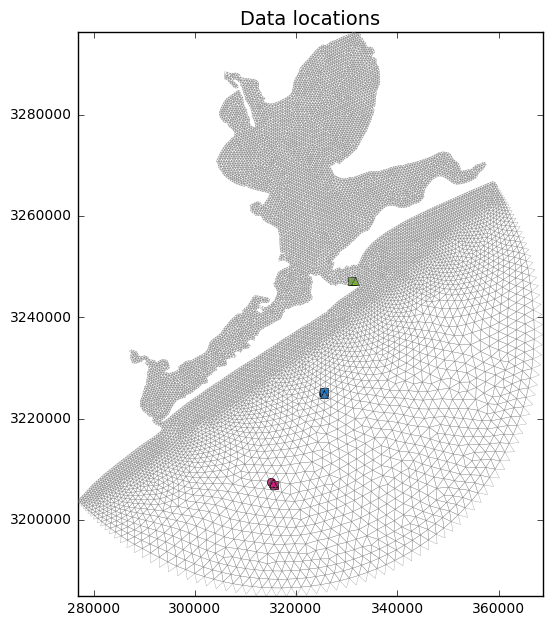

In [5]:
comp_tabs.plot_map(medcolors)

#### 2009

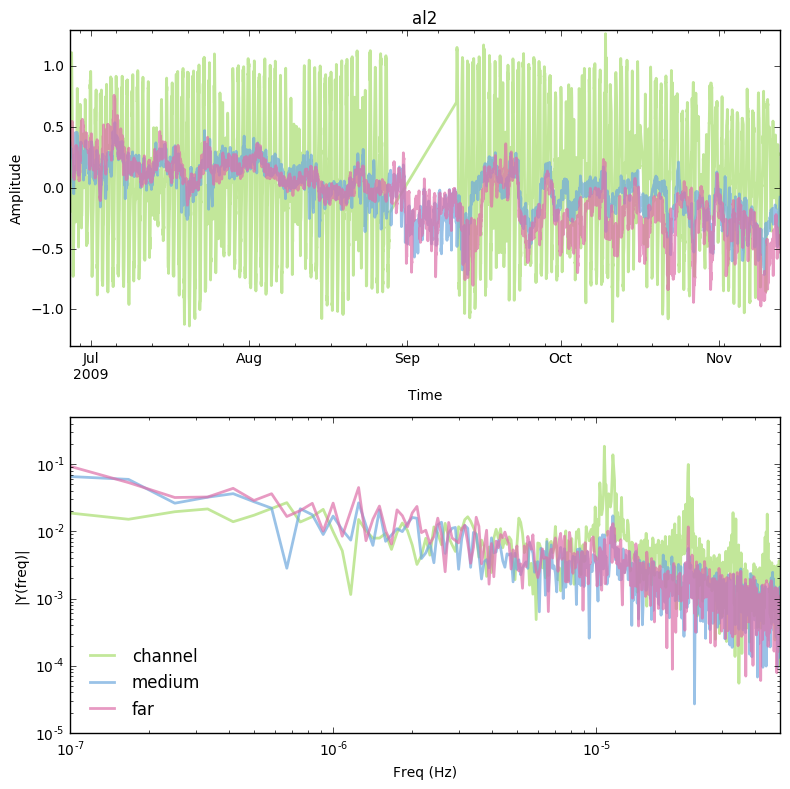

In [15]:
comp_tabs.plot_spectra([dfnoaas[0], dfwinds[0], dftabss[0]], 'al', colors=lightcolors,
                       legend=['channel', 'medium', 'far'])

#### 2010

In [25]:
dfwind = pd.read_pickle('calcs/df/data_' + dstarts[2] + '_' + dends[2] + '.pkl')
dfwind.iloc[:,12:].to_pickle('calcs/df/data_tabs_' + dstarts[2] + '_' + dends[2] + '.pkl')

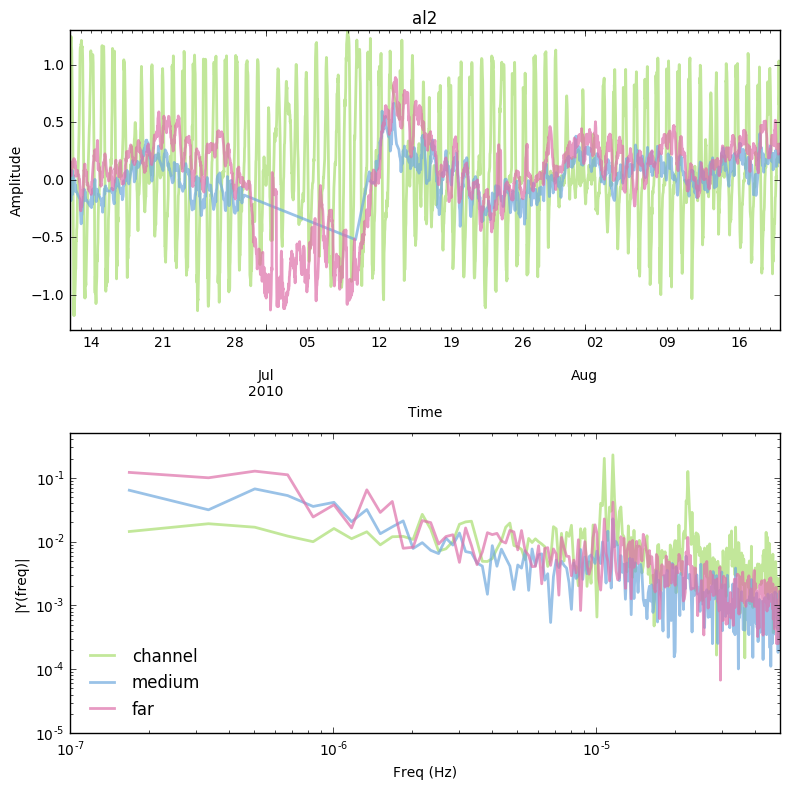

In [23]:
comp_tabs.plot_spectra([dfnoaas[1], dfwinds[1], dftabss[1]], 'al', colors=lightcolors,
                       legend=['channel', 'medium', 'far'])

#### 2011

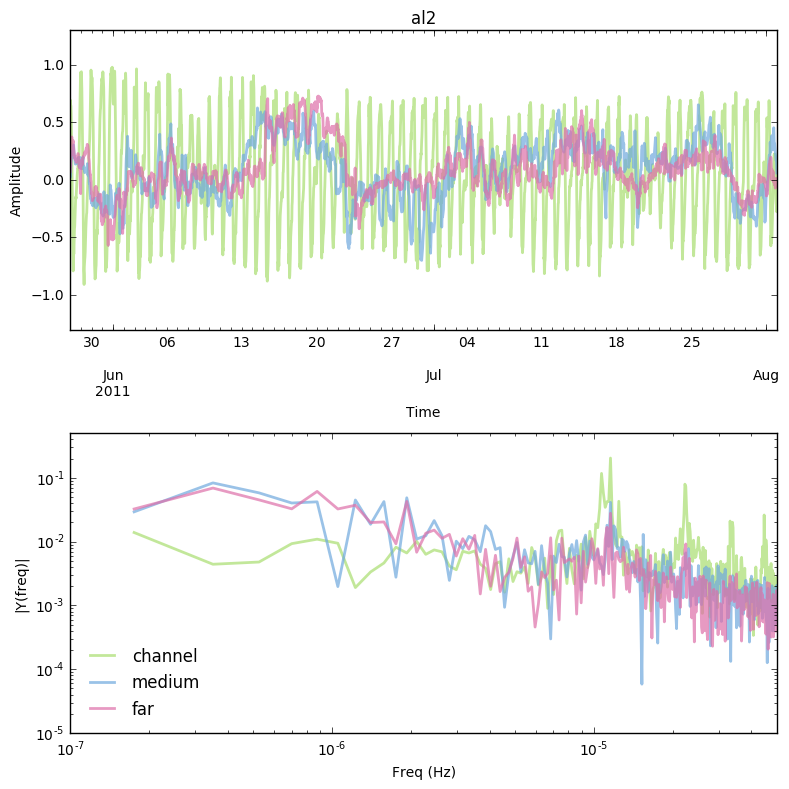

In [27]:
comp_tabs.plot_spectra([dfnoaas[2], dfwinds[2], dftabss[2]], 'al', colors=lightcolors,
                       legend=['channel', 'medium', 'far'])

### Bay model

#### 2009

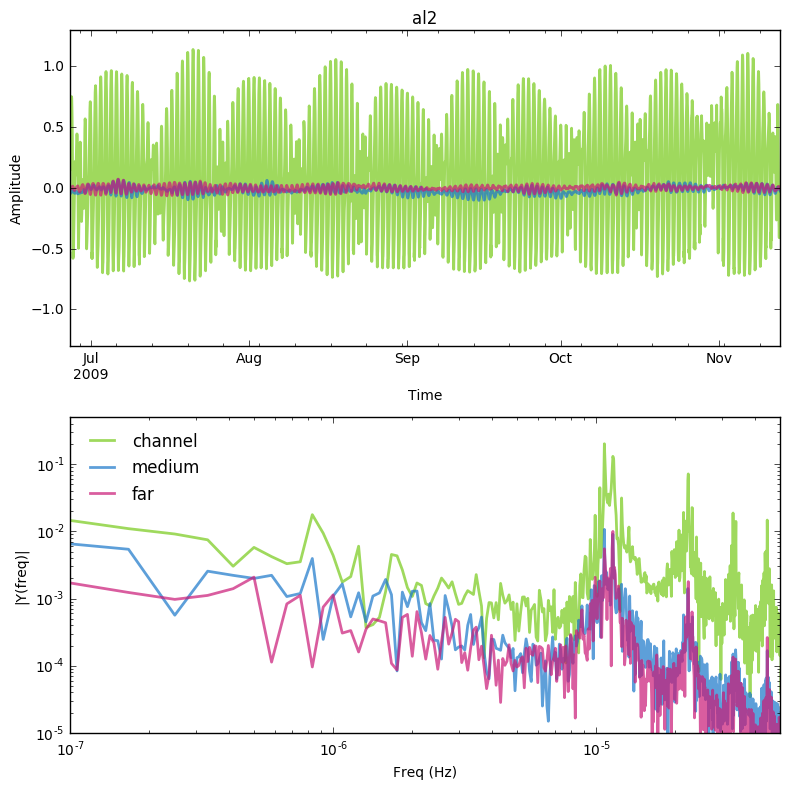

In [29]:
comp_tabs.plot_spectra([dfbays[0].iloc[:,:4], dfbays[0].iloc[:,4:8], dfbays[0].iloc[:,8:]], 'al',
                       colors=medcolors, legend=['channel', 'medium', 'far'])

#### 2010

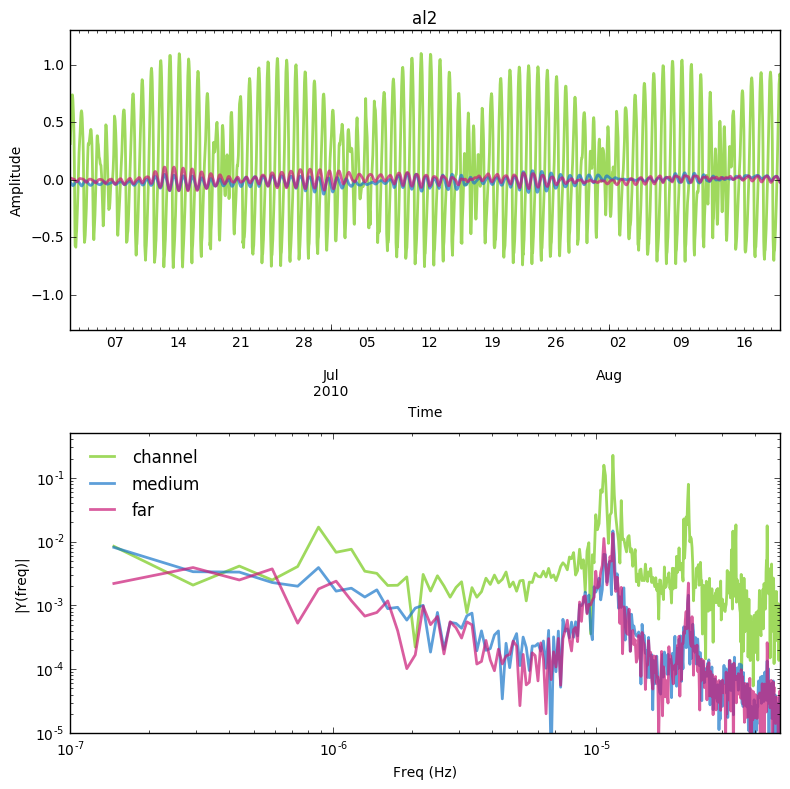

In [30]:
comp_tabs.plot_spectra([dfbays[1].iloc[:,:4], dfbays[1].iloc[:,4:8], dfbays[1].iloc[:,8:]], 'al',
                       colors=medcolors, legend=['channel', 'medium', 'far'])

#### 2011

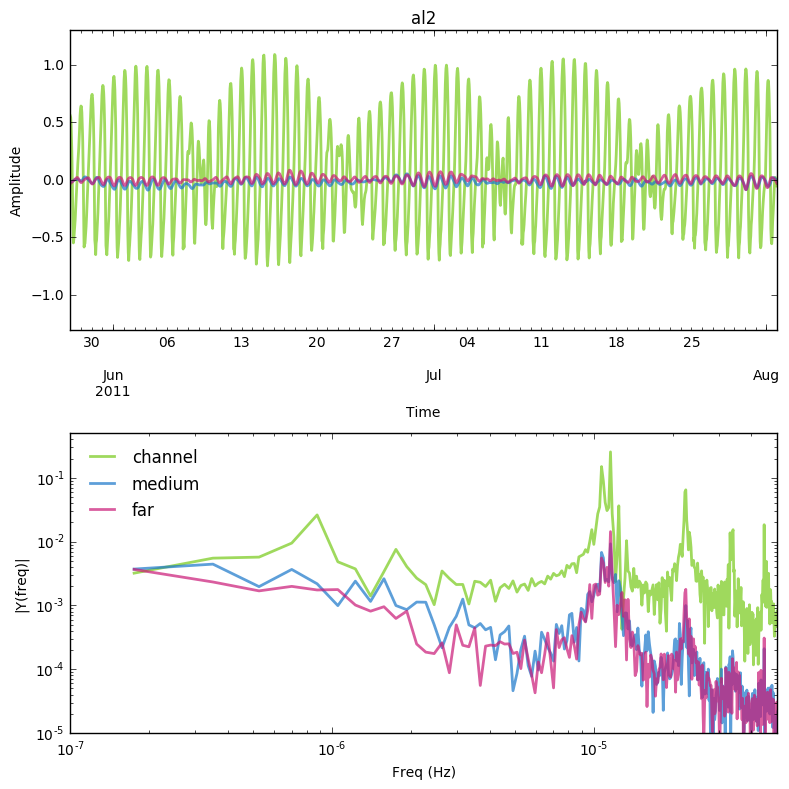

In [31]:
comp_tabs.plot_spectra([dfbays[2].iloc[:,:4], dfbays[2].iloc[:,4:8], dfbays[2].iloc[:,8:]], 'al',
                       colors=medcolors, legend=['channel', 'medium', 'far'])

### Shelf model

#### 2009

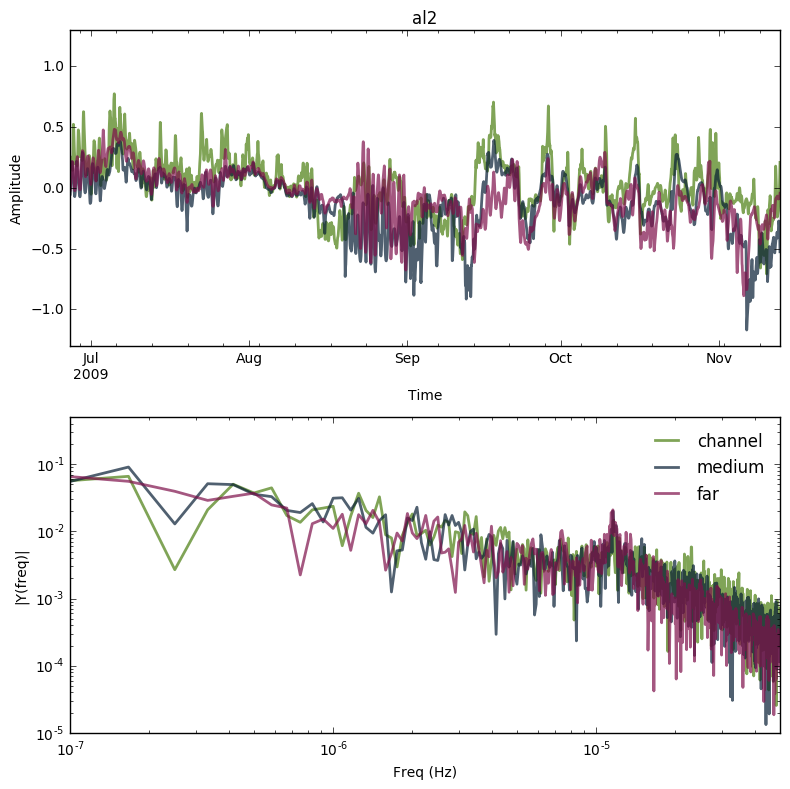

In [32]:
comp_tabs.plot_spectra([dfshelfs[0].iloc[:,:4], dfshelfs[0].iloc[:,4:8], dfshelfs[0].iloc[:,8:]], 'al',
                       colors=darkcolors, legend=['channel', 'medium', 'far'])

#### 2010

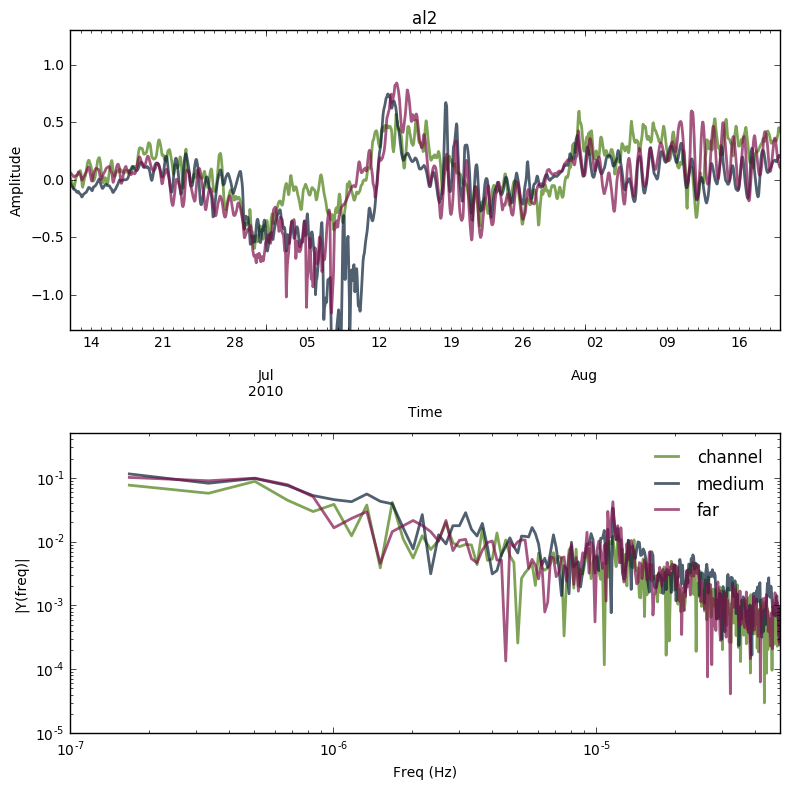

In [33]:
comp_tabs.plot_spectra([dfshelfs[1].iloc[:,:4], dfshelfs[1].iloc[:,4:8], dfshelfs[1].iloc[:,8:]], 'al',
                       colors=darkcolors, legend=['channel', 'medium', 'far'])

#### 2011

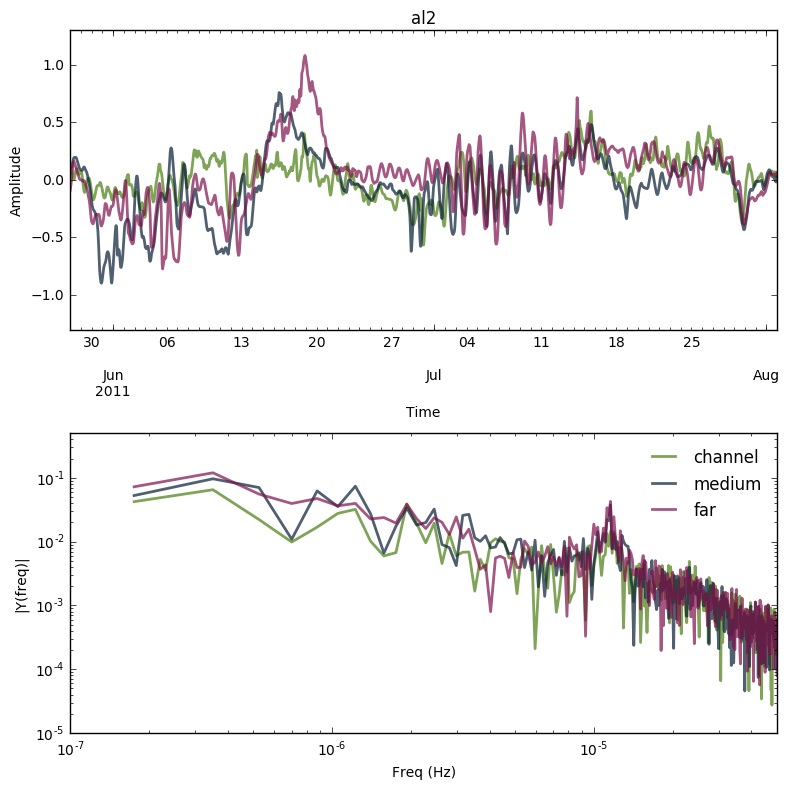

In [34]:
comp_tabs.plot_spectra([dfshelfs[2].iloc[:,:4], dfshelfs[2].iloc[:,4:8], dfshelfs[2].iloc[:,8:]], 'al',
                       colors=darkcolors, legend=['channel', 'medium', 'far'])

### Compare data vs. bay vs. shelf, and also data vs. bay + shelf

#### Channel entrance

##### 2009

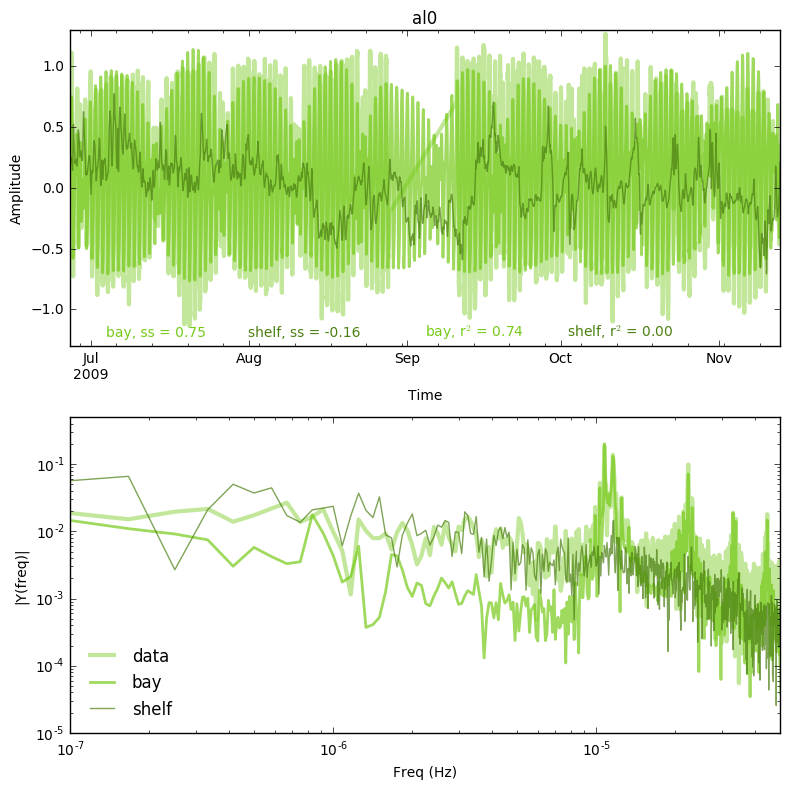

In [5]:
comp_tabs.plot_spectra([dfnoaas[0], dfbays[0].iloc[:,:4], dfshelfs[0].iloc[:,:4]], 'al', 
                       colors=gshades, lw=[3, 2, 1], legend=['data', 'bay', 'shelf'],
                       doss=True, dor2=True)

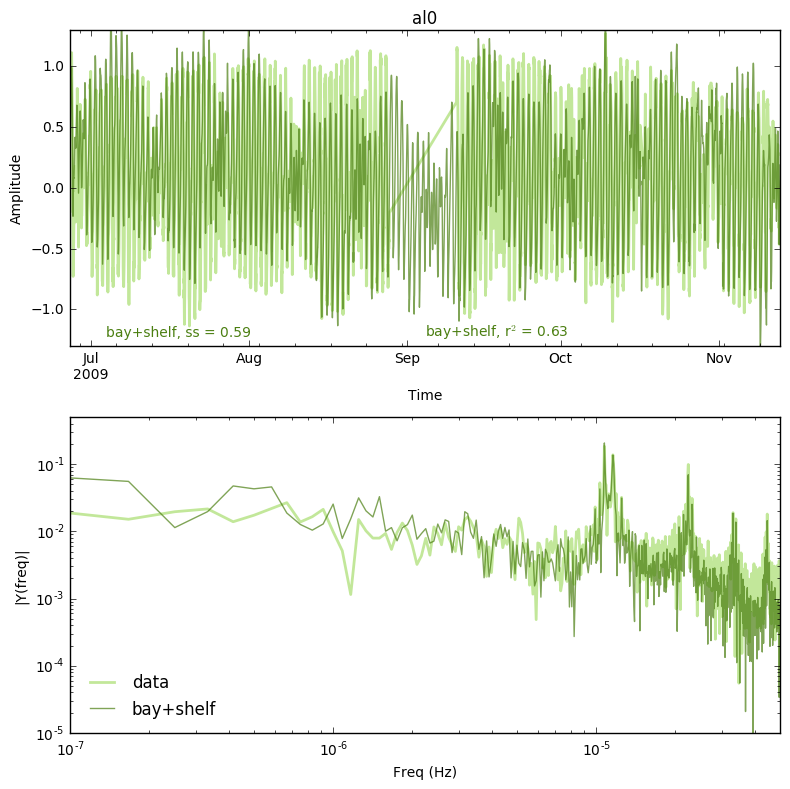

In [6]:
comp_tabs.plot_spectra([dfnoaas[0], dfbays[0].iloc[:,:4]+dfshelfs[0].iloc[:,:4]], 'al', 
                       colors=[gshades[0], gshades[2]], lw=[2, 1],
                       legend=['data', 'bay+shelf'], doss=True, dor2=True)

##### 2010

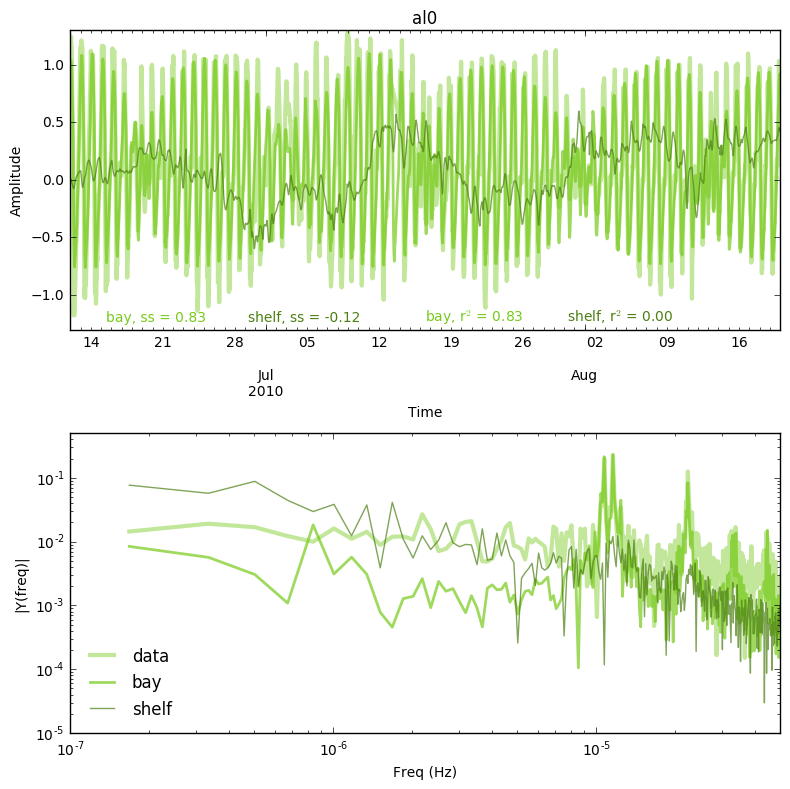

In [25]:
comp_tabs.plot_spectra([dfnoaas[1], dfbays[1].iloc[:,:4], dfshelfs[1].iloc[:,:4]], 'al', 
                       colors=gshades, lw=[3, 2, 1], legend=['data', 'bay', 'shelf'],
                      doss=True, dor2=True)

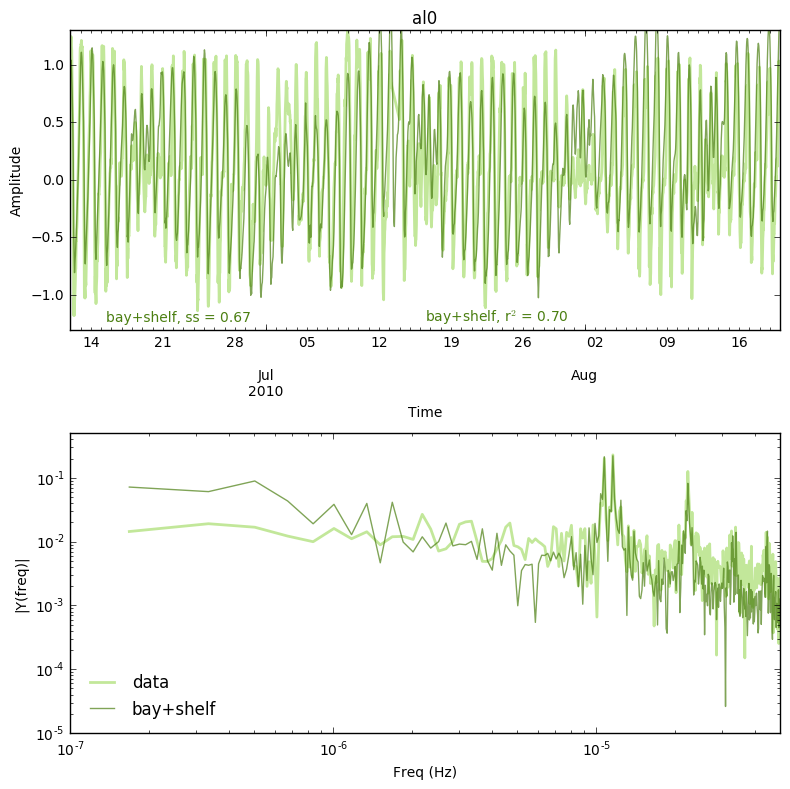

In [26]:
comp_tabs.plot_spectra([dfnoaas[1],
                        (dfbays[1].iloc[:,:4]+dfshelfs[1].iloc[:,:4])['2010-06-12':]], 'al', 
                       colors=[gshades[0], gshades[2]], lw=[2, 1],
                       legend=['data', 'bay+shelf'], doss=True, dor2=True)

##### 2011

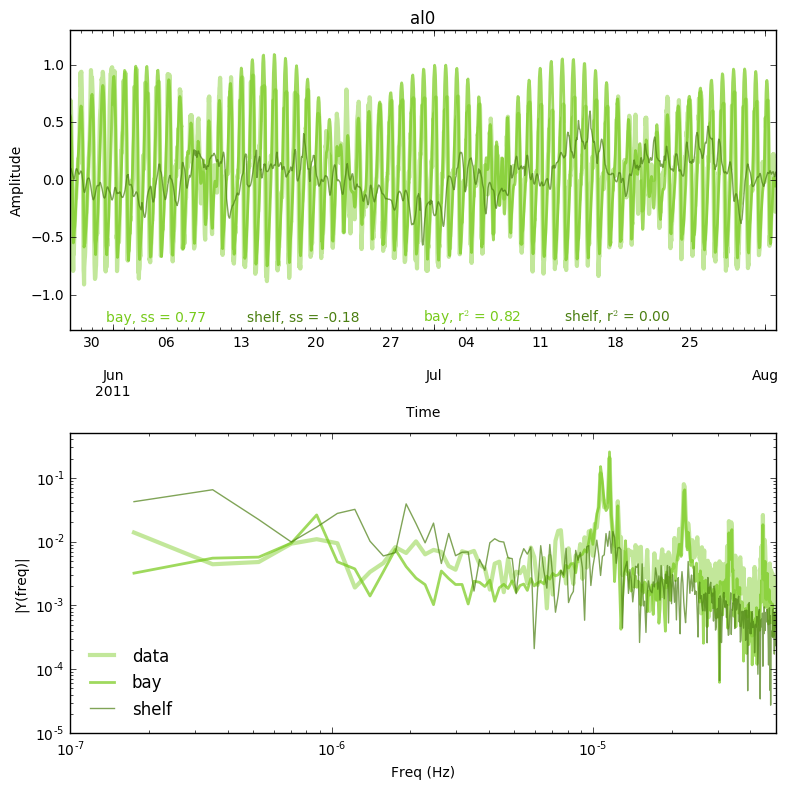

In [9]:
comp_tabs.plot_spectra([dfnoaas[2], dfbays[2].iloc[:,:4], dfshelfs[2].iloc[:,:4]], 'al', 
                       colors=gshades, lw=[3, 2, 1], legend=['data', 'bay', 'shelf'],
                      doss=True, dor2=True)

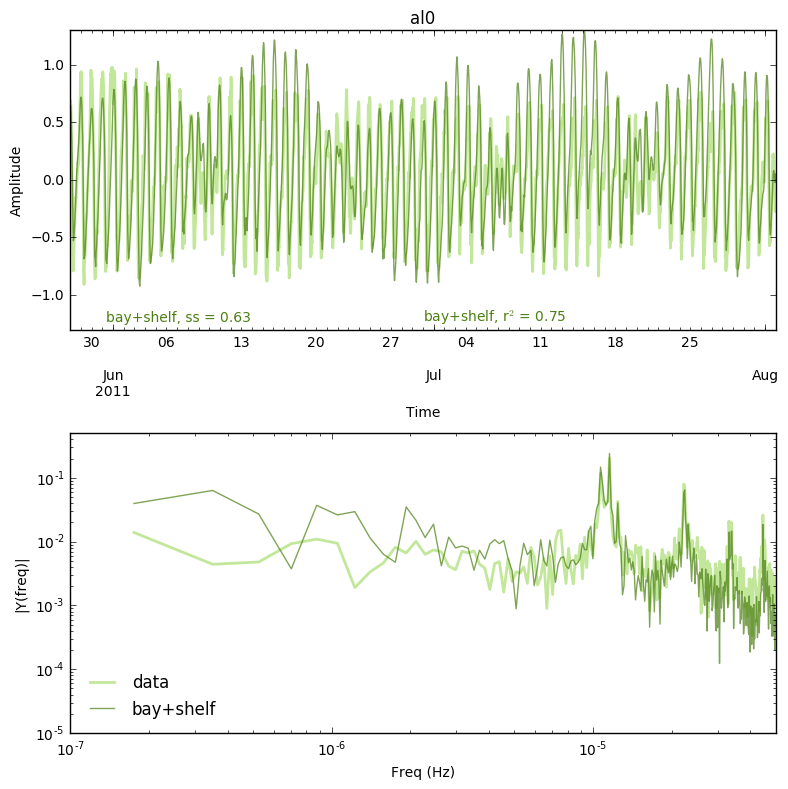

In [10]:
comp_tabs.plot_spectra([dfnoaas[2], dfbays[2].iloc[:,:4]+dfshelfs[2].iloc[:,:4]], 'al', 
                       colors=[gshades[0], gshades[2]], lw=[2, 1],
                       legend=['data', 'bay+shelf'], doss=True, dor2=True)

#### Medium distance

##### 2009

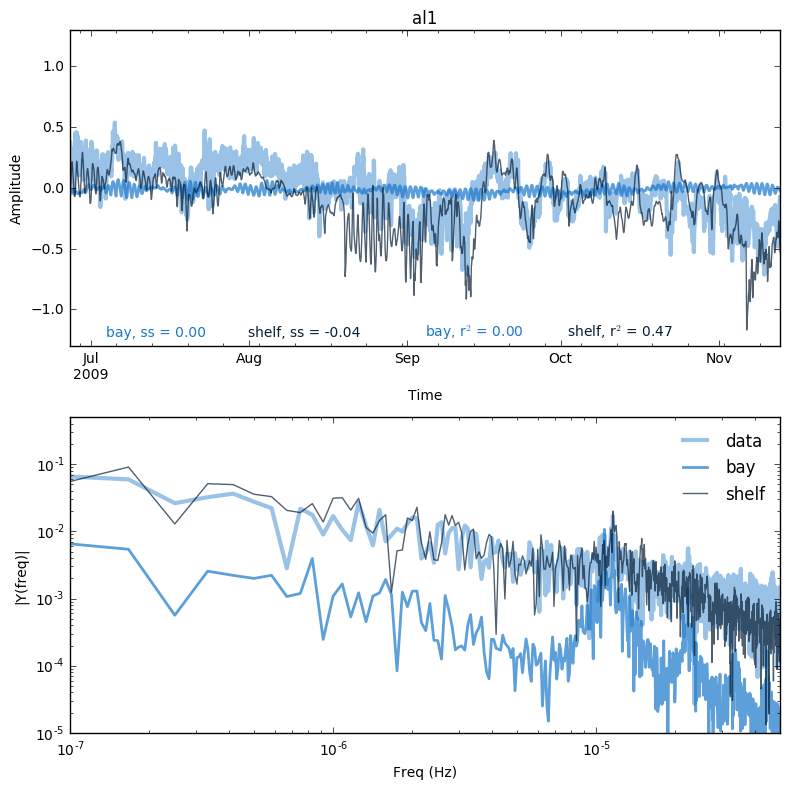

In [27]:
comp_tabs.plot_spectra([dfwinds[0], dfbays[0].iloc[:,4:8], dfshelfs[0].iloc[:,4:8]], 'al', 
                       colors=bshades, lw=[3, 2, 1], legend=['data', 'bay', 'shelf'],
                      doss=True, dor2=True)

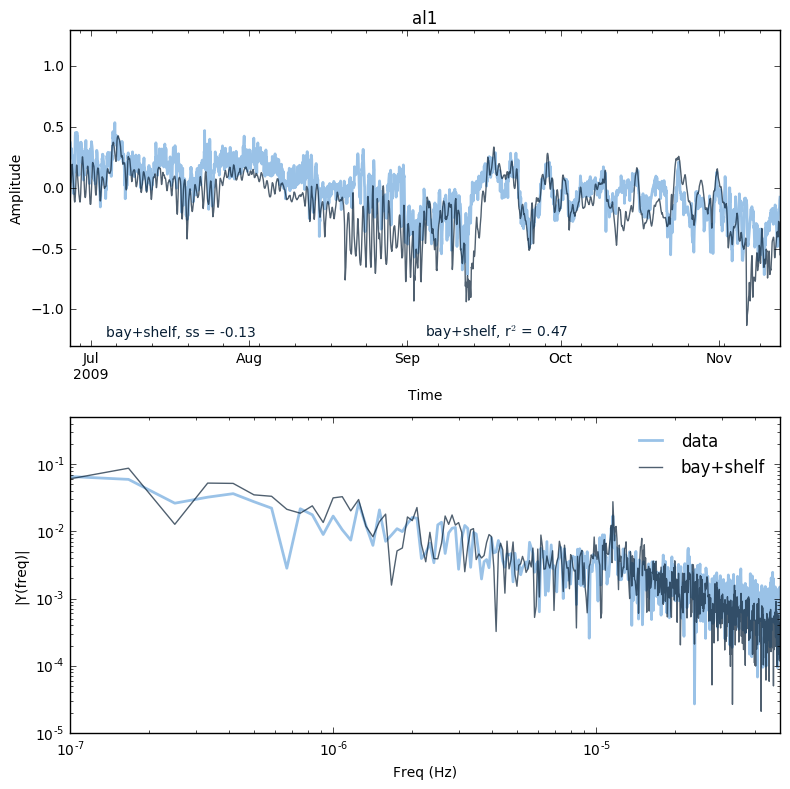

In [28]:
comp_tabs.plot_spectra([dfwinds[0], dfbays[0].iloc[:,4:8]+dfshelfs[0].iloc[:,4:8]], 'al', 
                       colors=[bshades[0], bshades[2]], lw=[2, 1],
                       legend=['data', 'bay+shelf'], doss=True, dor2=True)

##### 2010

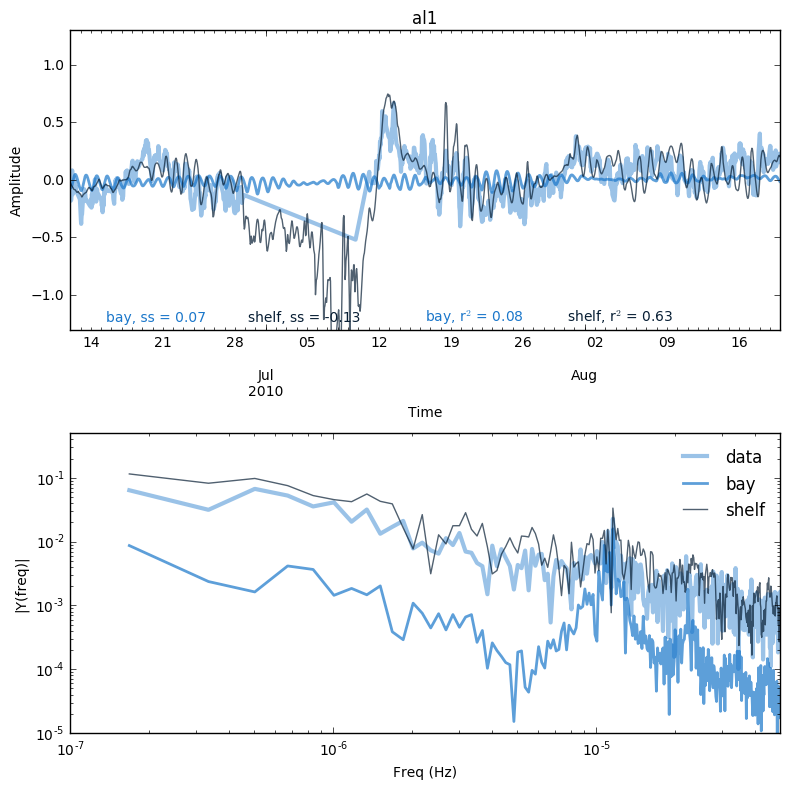

In [29]:
comp_tabs.plot_spectra([dfwinds[1], dfbays[1].iloc[:,4:8], dfshelfs[1].iloc[:,4:8]], 'al', 
                       colors=bshades, lw=[3, 2, 1], legend=['data', 'bay', 'shelf'],
                      doss=True, dor2=True)

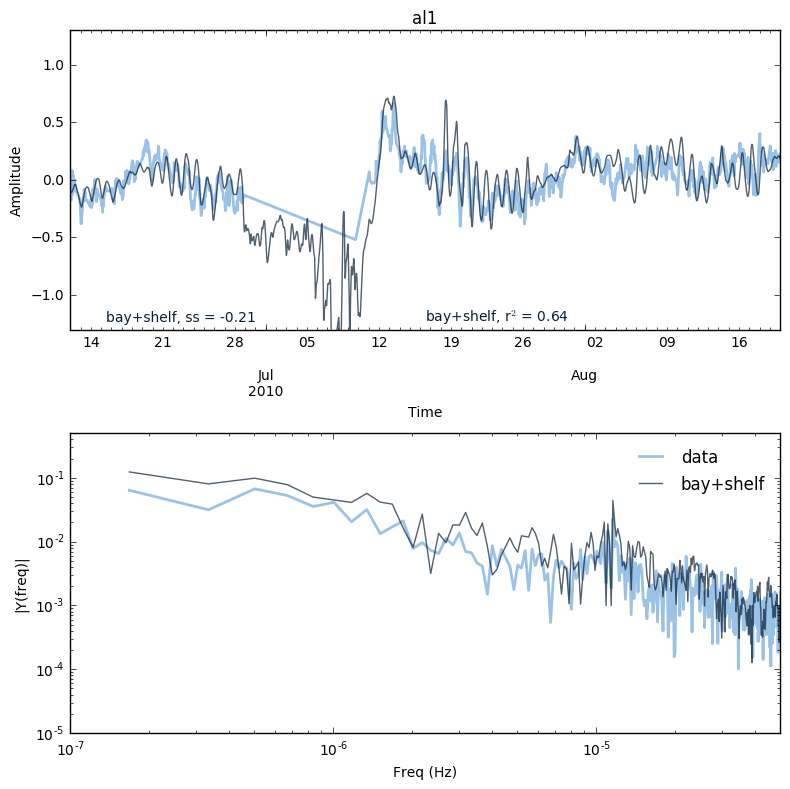

In [30]:
comp_tabs.plot_spectra([dfwinds[1], (dfbays[1].iloc[:,4:8]+dfshelfs[1].iloc[:,4:8])['2010-06-12':]], 'al', 
                       colors=[bshades[0], bshades[2]], lw=[2, 1], legend=['data', 'bay+shelf'],
                      doss=True, dor2=True)

##### 2011

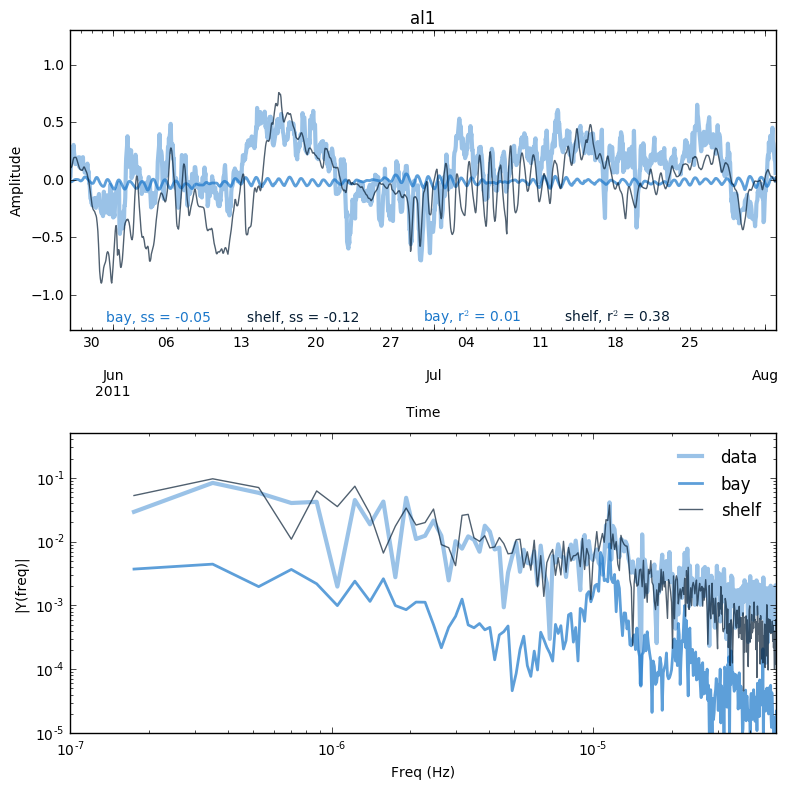

In [31]:
comp_tabs.plot_spectra([dfwinds[2], dfbays[2].iloc[:,4:8], dfshelfs[2].iloc[:,4:8]], 'al', 
                       colors=bshades, lw=[3, 2, 1], legend=['data', 'bay', 'shelf'],
                      doss=True, dor2=True)

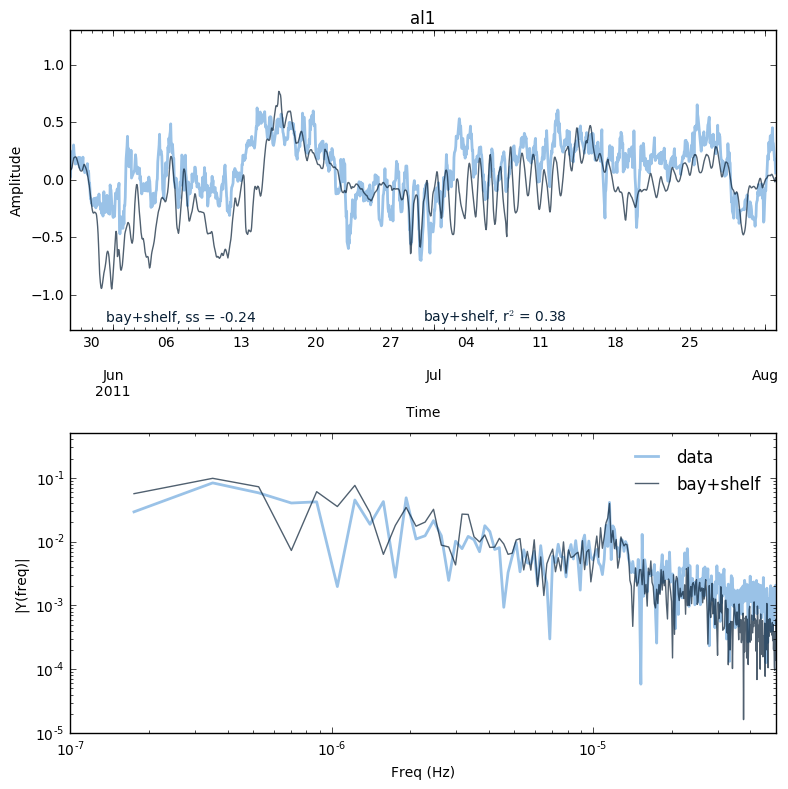

In [32]:
comp_tabs.plot_spectra([dfwinds[2], dfbays[2].iloc[:,4:8]+dfshelfs[2].iloc[:,4:8]], 'al', 
                       colors=[bshades[0], bshades[2]], lw=[2, 1],
                       legend=['data', 'bay+shelf'], doss=True, dor2=True)

#### Far distance

##### 2009

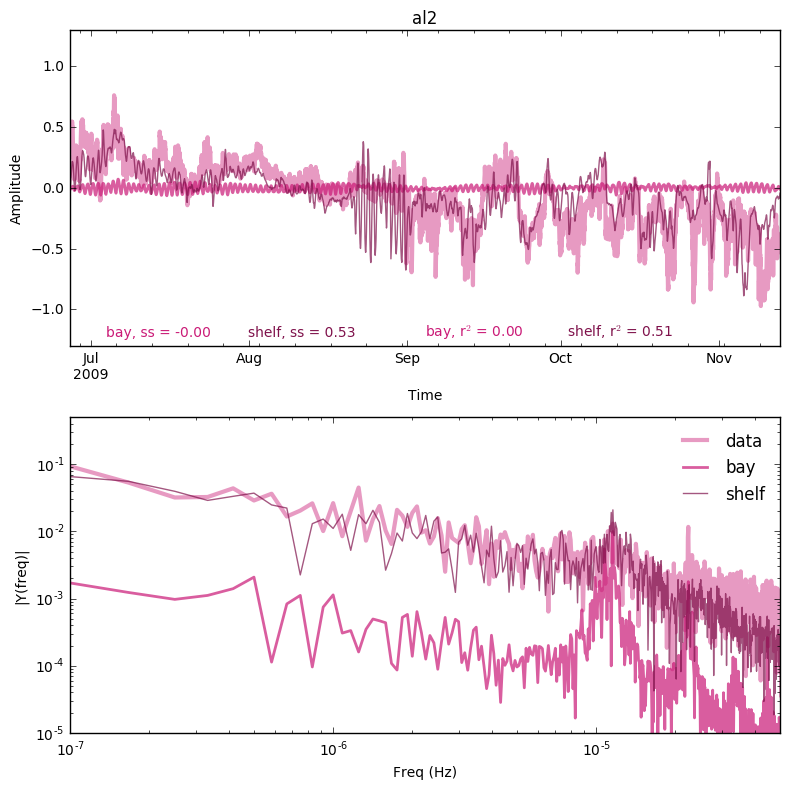

In [33]:
comp_tabs.plot_spectra([dftabss[0], dfbays[0].iloc[:,8:], dfshelfs[0].iloc[:,8:]], 'al', 
                       colors=pshades, lw=[3, 2, 1], legend=['data', 'bay', 'shelf'],
                      doss=True, dor2=True)

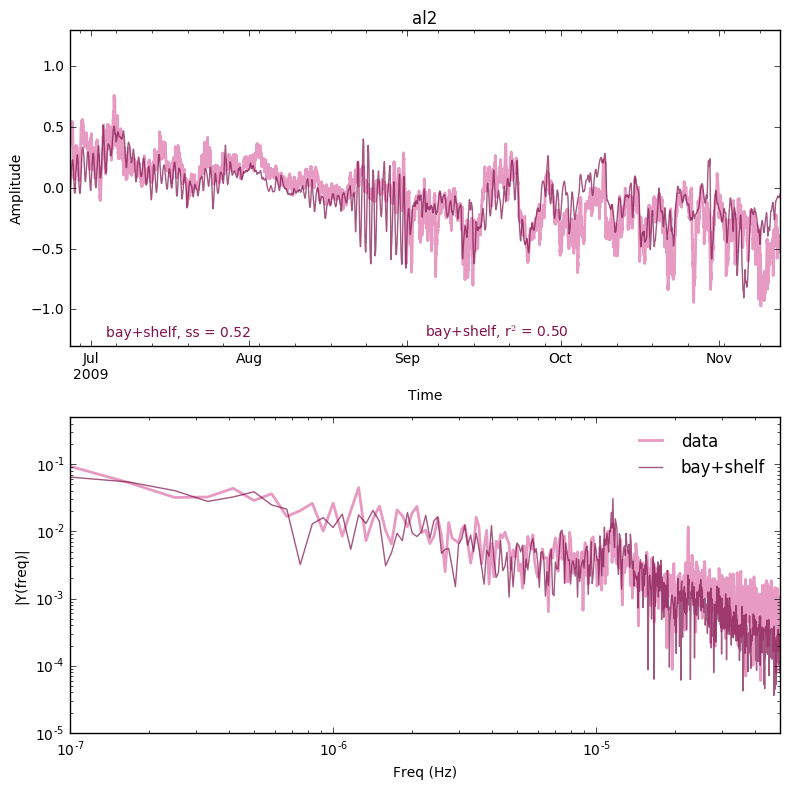

In [34]:
comp_tabs.plot_spectra([dftabss[0], dfbays[0].iloc[:,8:]+dfshelfs[0].iloc[:,8:]], 'al', 
                       colors=[pshades[0], pshades[2]], lw=[2, 1],
                       legend=['data', 'bay+shelf'], doss=True, dor2=True)

##### 2010

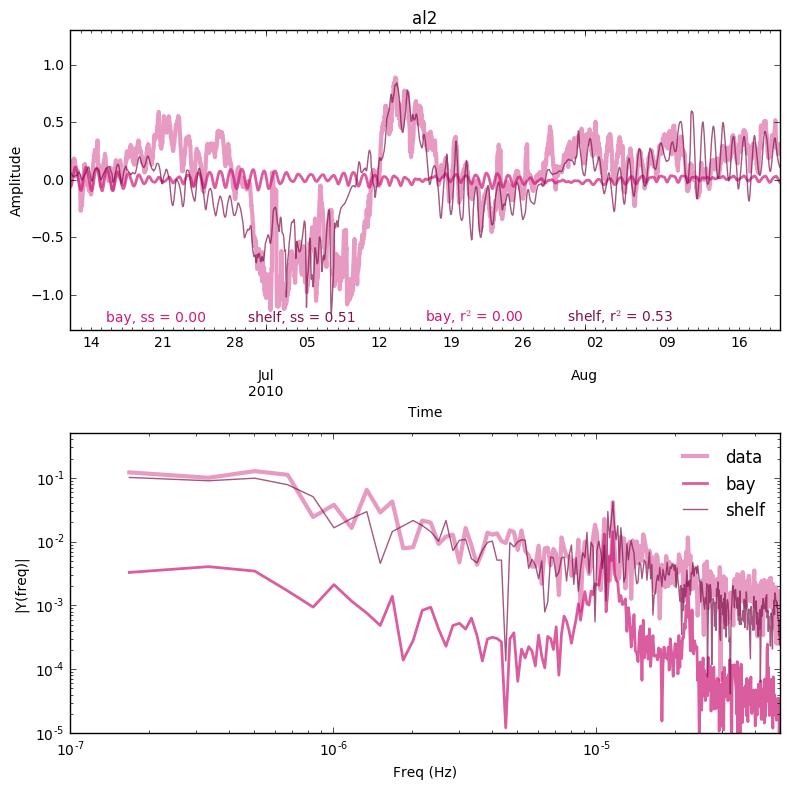

In [35]:
comp_tabs.plot_spectra([dftabss[1], dfbays[1].iloc[:,8:], dfshelfs[1].iloc[:,8:]], 'al', 
                       colors=pshades, lw=[3, 2, 1], legend=['data', 'bay', 'shelf'],
                      doss=True, dor2=True)

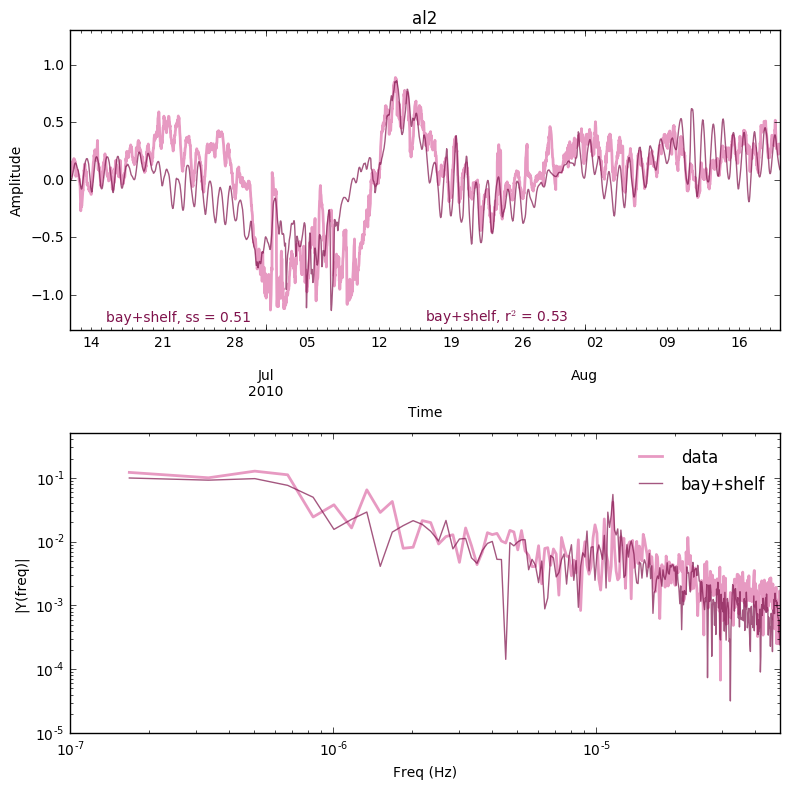

In [36]:
comp_tabs.plot_spectra([dftabss[1], 
                        (dfbays[1].iloc[:,8:]+dfshelfs[1].iloc[:,8:])['2010-06-12':]], 'al', 
                        colors=[pshades[0], pshades[2]], lw=[2, 1], 
                       legend=['data', 'bay+shelf'], doss=True, dor2=True)

##### 2011

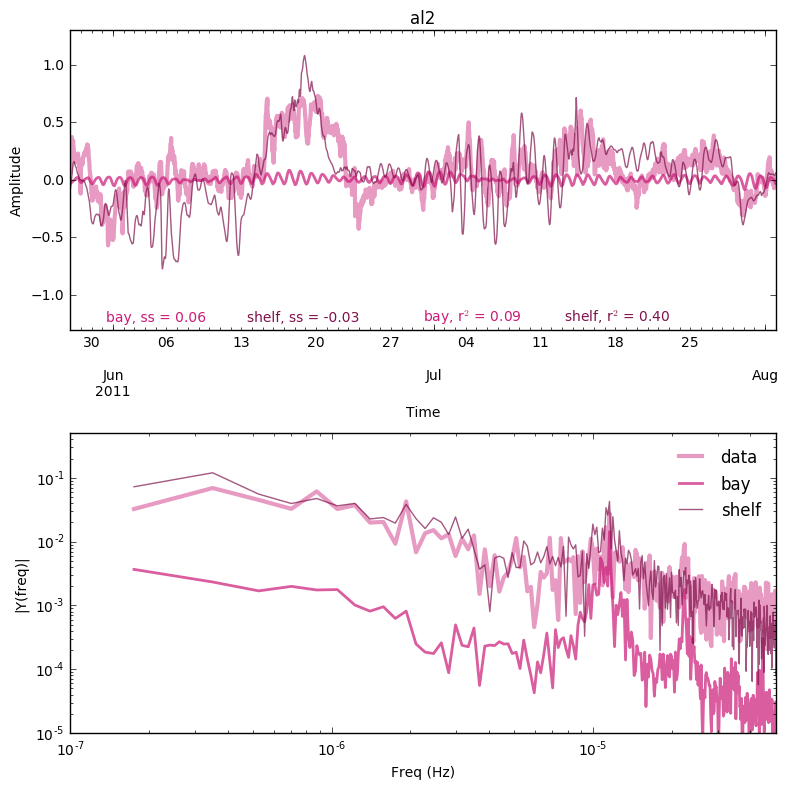

In [37]:
comp_tabs.plot_spectra([dftabss[2], dfbays[2].iloc[:,8:], dfshelfs[2].iloc[:,8:]], 'al', 
                       colors=pshades, lw=[3, 2, 1], legend=['data', 'bay', 'shelf'],
                       doss=True, dor2=True)

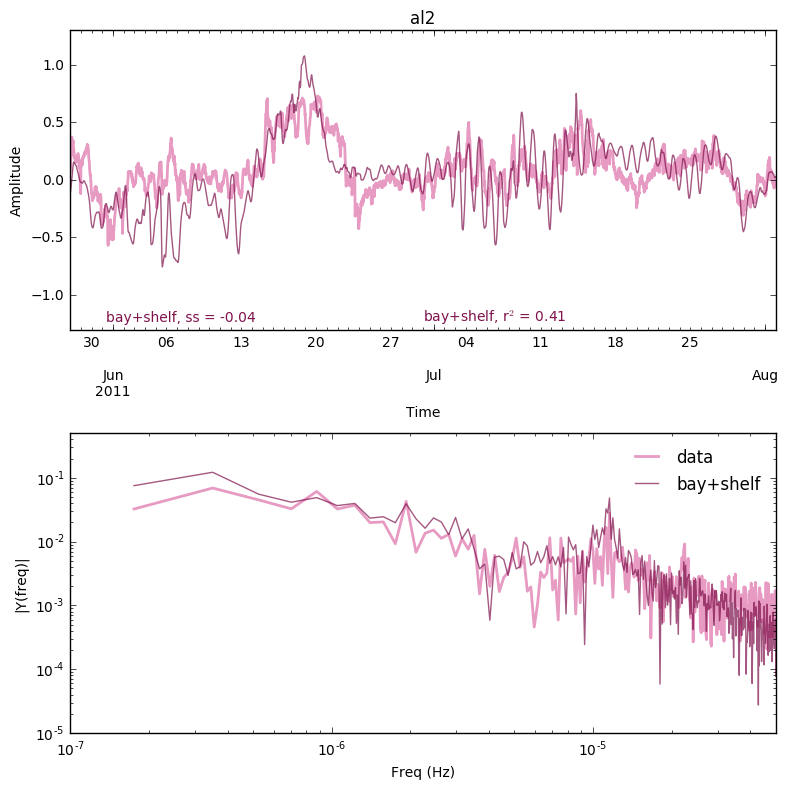

In [38]:
comp_tabs.plot_spectra([dftabss[2], dfbays[2].iloc[:,8:]+dfshelfs[2].iloc[:,8:]], 'al',
                       colors=[pshades[0], pshades[2]], lw=[2, 1], legend=['data', 'bay+shelf'],
                       doss=True, dor2=True)

Points to make:

* There is not much evidence of dynamics that are lower frequency than tidal in the bay model output (as seen in frequency spectra and after filtering out tides in time signals)
* This could imply that adding together bay and shelf is feasible in theory
* BUT, the correlation between the combined signal with the data is lower than just the bay at the channel entrance.
* The shelf signal vs. the data is slightly improved with the bay signal added in at the medium site
* the main advantage of this approach is to not have to choose where the bay matters ahead of time, which ends up predefining the physics, especially for the drifters

In [147]:
# from glob import glob
# Files = glob('/rho/raid/dongyu/200907/*')
# import read2df
# dstart = '2009-07-01'
# dend = '2009-07-31'
# df = read2df.readbay(dstart, dend, Files)
# fname = 'calcs/df/bay_wshelf' + dstart + '_' + dend + '.pkl'
# df.to_pickle(fname)

In [ ]:
# from glob import glob
# Files = glob('/rho/raid/dongyu/201007/*')
# import read2df
# dstart = '2010-07-01'
# dend = '2010-07-31'
# df = read2df.readbay(dstart, dend, Files)
# fname = 'calcs/df/bay_wshelf' + dstart + '_' + dend + '.pkl'
# df.to_pickle(fname)

In [148]:
dstarts = ['2009-07-01', '2010-07-01']
dends = ['2009-07-31', '2010-07-31']

dfbays2 = []
for dstart, dend in zip(dstarts, dends):
    # Bay
    dfbays2.append(pd.read_pickle('calcs/df/bay_wshelf' + dstart + '_' + dend + '.pkl'))


In [152]:
dftabss[0]['2009-07']

u2      v2  Speed   Dir  WaterT       al2       ac2
Date_Time                                                                   
2009-07-01 00:00:00  0.4290  0.0492  43.18  83.5    29.8  0.413273 -0.125167
2009-07-01 00:30:00  0.4092  0.0410  41.12  84.3    29.8  0.391845 -0.124832
2009-07-01 01:00:00  0.3800  0.0455  38.27  83.2    29.6  0.366832 -0.109109
2009-07-01 01:30:00  0.3878  0.0603  39.25  81.2    29.6  0.379867 -0.098622
2009-07-01 02:00:00  0.4116  0.0597  41.59  81.7    29.5  0.401472 -0.108622
2009-07-01 02:30:00  0.3902  0.0815  39.86  78.2    29.2  0.390486 -0.080117
2009-07-01 03:00:00  0.4147  0.1657  44.66  68.2    29.5  0.446402 -0.012565
2009-07-01 03:30:00  0.4091  0.1715  44.36  67.3    29.6  0.443565 -0.005019
2009-07-01 04:00:00  0.3795  0.1741  41.75  65.4    29.7  0.417430  0.009120
2009-07-01 04:30:00  0.3339  0.1511  36.65  65.7    29.6  0.366446  0.006114
2009-07-01 05:00:00  0.2852  0.1941  34.50  55.8    29.5  0.338821  0.064915
2009-07-01 05:30:00  0.2965  0.2079  36.21  55.0    29.5  0.354671  0.073095
2009-07-01 06:00:00  0.2589  0.1926  32.27  53.4    29.5  0.314087  0.073980
2009-07-01 06:30:00  0.2491  0.1490  29.03  59.1    29.5  0.287783  0.037855
2009-07-01 07:00:00  0.2783  0.1495  31.59  61.8    29.6  0.314781  0.026720
2009-07-01 07:30:00  0.2675  0.1392  30.16  62.5    29.6  0.300779  0.021555
2009-07-01 08:00:00  0.2710  0.1156  29.46  66.9    29.6  0.294622 -0.001495
2009-07-01 08:30:00  0.1822  0.1090  21.23  59.1    29.5  0.210500  0.027703
2009-07-01 09:00:00  0.1702  0.0699  18.40  67.7    29.5  0.183963 -0.003419
2009-07-01 09:30:00  0.1998  0.0611  20.89  73.0    29.5  0.207636 -0.023247
2009-07-01 10:00:00  0.1978  0.0508  20.42  75.6    29.4  0.201711 -0.031907
2009-07-01 10:30:00  0.1875  0.0566  19.59  73.2    29.3  0.194561 -0.022494
2009-07-01 11:00:00  0.1738  0.0302  17.64  80.1    29.3  0.171505 -0.041285
2009-07-01 11:30:00  0.1785  0.0144  17.91  85.4    29.3  0.169546 -0.057652
2009-07-01 12:00:00  0.1418  0.0451  14.88  72.4    29.2  0.148051 -0.014905
2009-07-01 12:30:00  0.1265  0.0793  14.93  57.9    29.3  0.147587  0.022559
2009-07-01 13:00:00  0.1578  0.0941  18.37  59.2    29.2  0.182190  0.023715
2009-07-01 13:30:00  0.1494  0.0937  17.64  57.9    29.1  0.174322  0.026683
2009-07-01 14:00:00  0.1743  0.0648  18.60  69.6    28.9  0.185701 -0.009727
2009-07-01 14:30:00  0.1741  0.0783  19.09  65.8    28.8  0.190877  0.002742
...                     ...     ...    ...   ...     ...       ...       ...
2009-07-31 09:00:00  0.1992  0.0951  22.07  64.5    28.9  0.220584  0.008196
2009-07-31 09:30:00  0.2014  0.0836  21.81  67.5    28.9  0.218038 -0.003232
2009-07-31 10:00:00  0.2211  0.0600  22.91  74.8    28.9  0.226749 -0.032714
2009-07-31 10:30:00  0.2252  0.1168  25.37  62.6    28.9  0.253063  0.017790
2009-07-31 11:00:00  0.2406  0.0976  25.96  67.9    28.9  0.259574 -0.005946
2009-07-31 11:30:00  0.2222  0.0832  23.73  69.5    28.9  0.236969 -0.011857
2009-07-31 12:00:00  0.1717  0.0439  17.72  75.7    28.9  0.175017 -0.027877
2009-07-31 12:30:00  0.1983  0.0447  20.33  77.3    28.9  0.199748 -0.037704
2009-07-31 13:00:00  0.1981  0.0630  20.79  72.4    28.8  0.206830 -0.020829
2009-07-31 13:30:00  0.1896  0.0588  19.85  72.8    28.8  0.197361 -0.021309
2009-07-31 14:00:00  0.1814  0.0797  19.81  66.3    28.8  0.198133  0.001129
2009-07-31 14:30:00  0.1564  0.0761  17.39  64.1    28.9  0.173759  0.007751
2009-07-31 15:00:00  0.1733  0.0917  19.61  62.1    28.9  0.195463  0.015359
2009-07-31 15:30:00  0.1440  0.0949  17.25  56.6    28.9  0.169842  0.029929
2009-07-31 16:00:00  0.1333  0.0587  14.57  66.2    28.9  0.145649  0.000952
2009-07-31 16:30:00  0.1943  0.0899  21.41  65.2    29.0  0.214023  0.005369
2009-07-31 17:00:00  0.2242  0.0967  24.42  66.7    29.0  0.244165 -0.000261
2009-07-31 17:30:00  0.1840  0.1173  21.82  57.5    29.1  0.215448  0.034606
2009-07-31 18:00:00  0.1966  0.1046  22.27  62.0    29.1  0.221970  0.017948
2009-07-31 18:30:00  

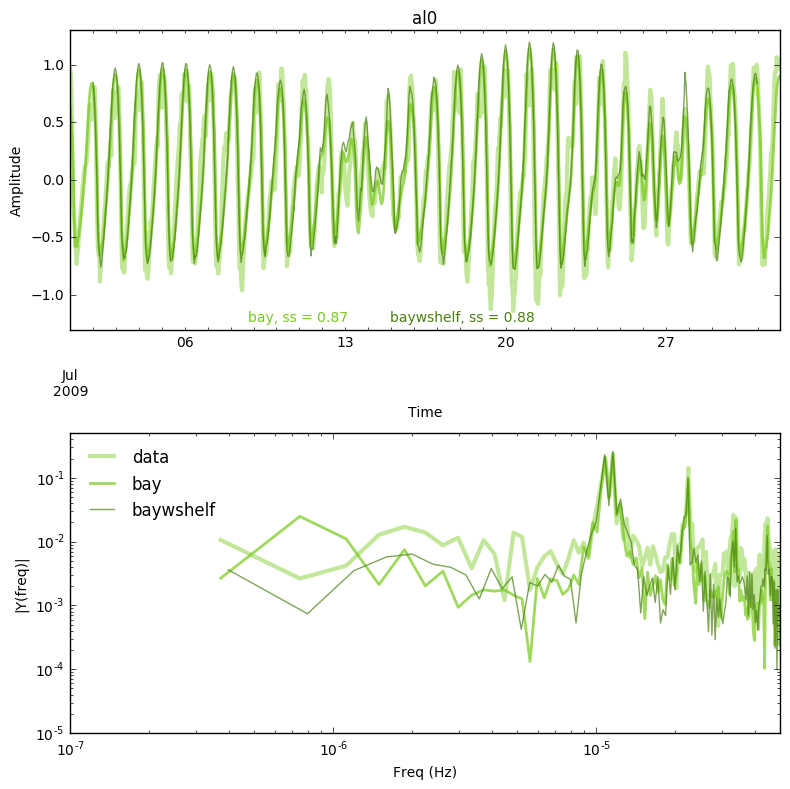

In [153]:
# 2009, channel
comp_tabs.plot_spectra([dfnoaas[0]['2009-07'], dfbays[0].iloc[:,:4]['2009-07'], 
                        dfbays2[0].iloc[:,:4]], 'al', 
                       colors=gshades, lw=[3, 2, 1], legend=['data', 'bay', 'baywshelf'],
                      doss=True)

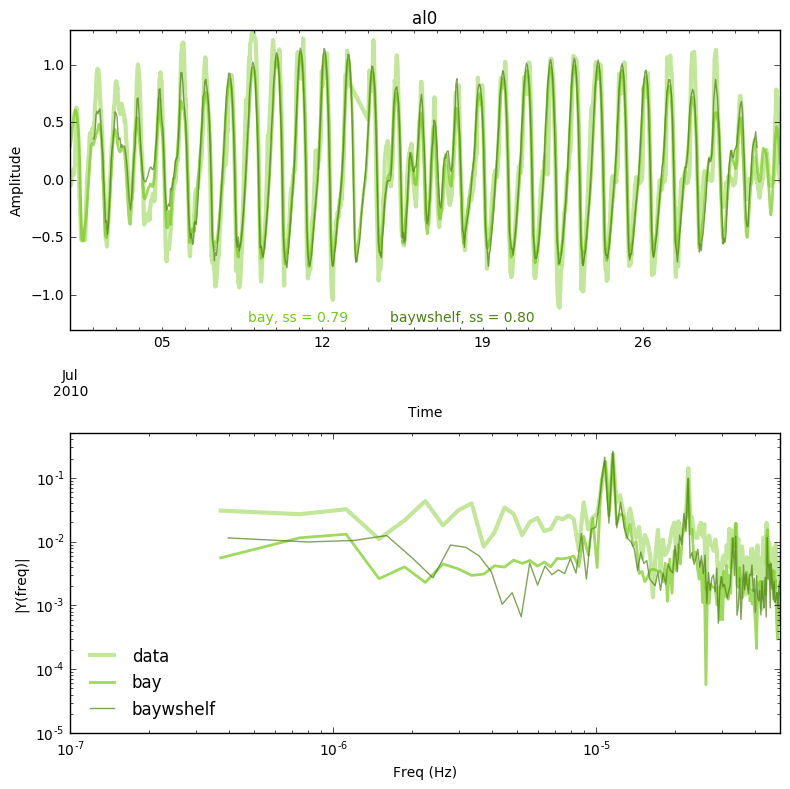

In [154]:
# 2010, channel
comp_tabs.plot_spectra([dfnoaas[1]['2010-07'], dfbays[1].iloc[:,:4]['2010-07'], 
                        dfbays2[1].iloc[:,:4]], 'al', 
                       colors=gshades, lw=[3, 2, 1], legend=['data', 'bay', 'baywshelf'],
                      doss=True)

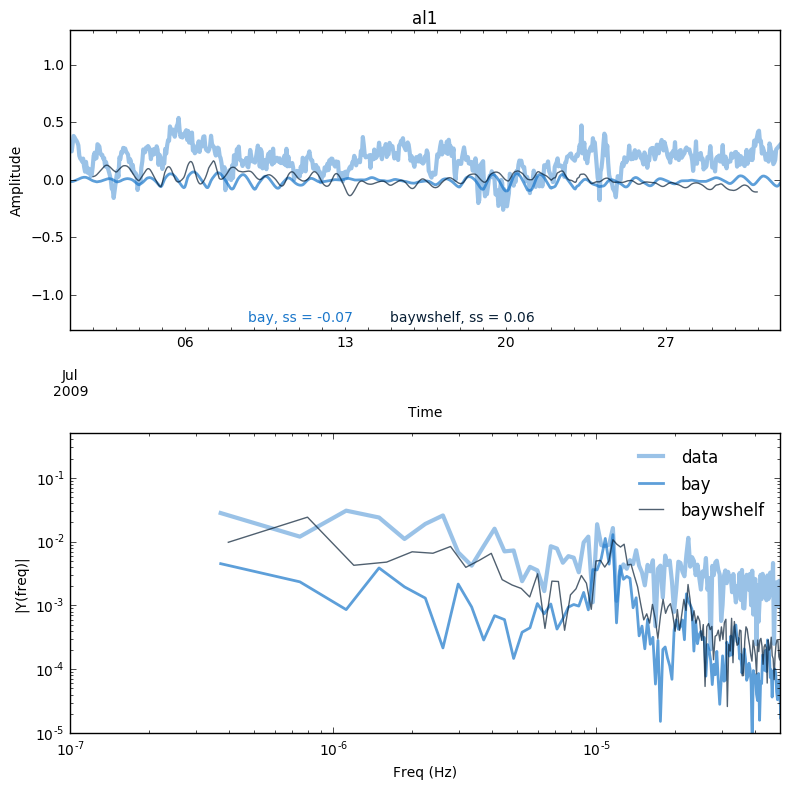

In [156]:
# 2009, medium
comp_tabs.plot_spectra([dfwinds[0]['2009-07'], dfbays[0].iloc[:,4:8]['2009-07'], 
                        dfbays2[0].iloc[:,4:8]], 'al', 
                       colors=bshades, lw=[3, 2, 1], legend=['data', 'bay', 'baywshelf'],
                      doss=True)

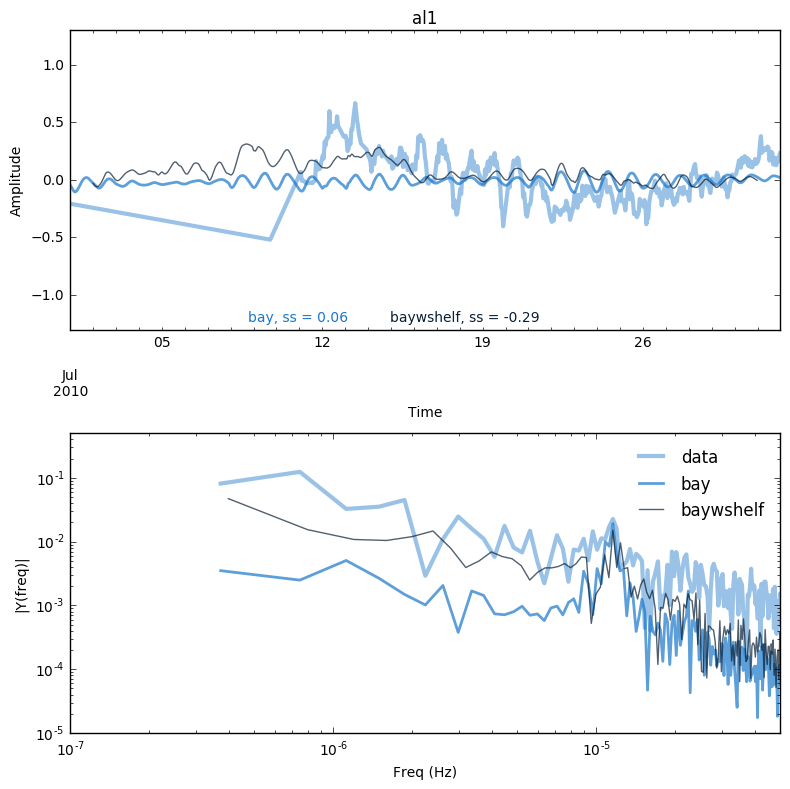

In [158]:
# 2010, medium
comp_tabs.plot_spectra([dfwinds[1]['2010-07'], dfbays[1].iloc[:,4:8]['2010-07'], 
                        dfbays2[1].iloc[:,4:8]], 'al', 
                       colors=bshades, lw=[3, 2, 1], legend=['data', 'bay', 'baywshelf'],
                      doss=True)

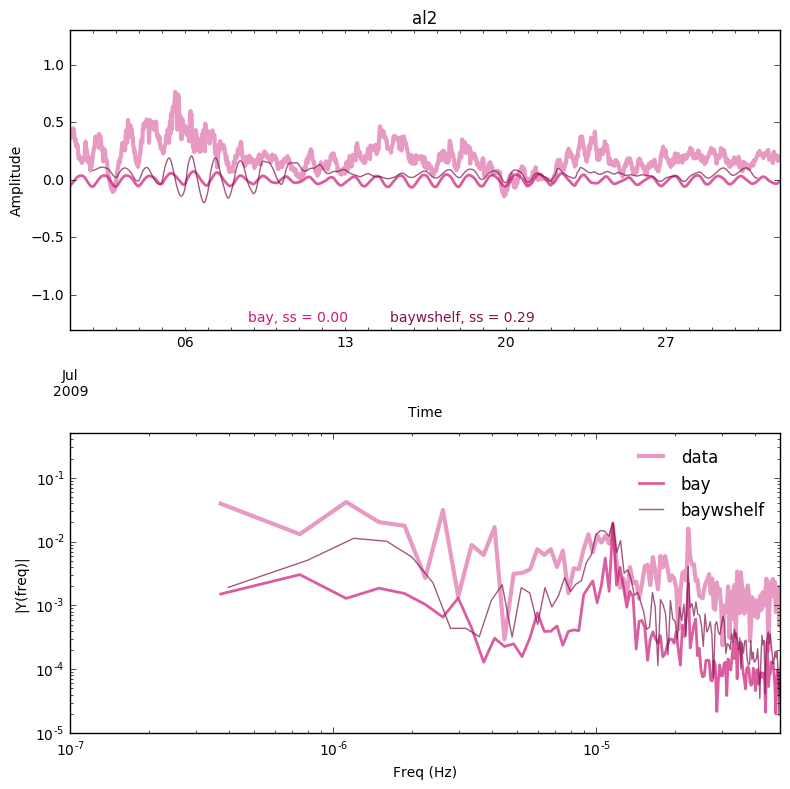

In [159]:
# 2009, far
comp_tabs.plot_spectra([dftabss[0]['2009-07'], dfbays[0].iloc[:,8:]['2009-07'], 
                        dfbays2[0].iloc[:,8:]], 'al', 
                       colors=pshades, lw=[3, 2, 1], legend=['data', 'bay', 'baywshelf'],
                      doss=True)

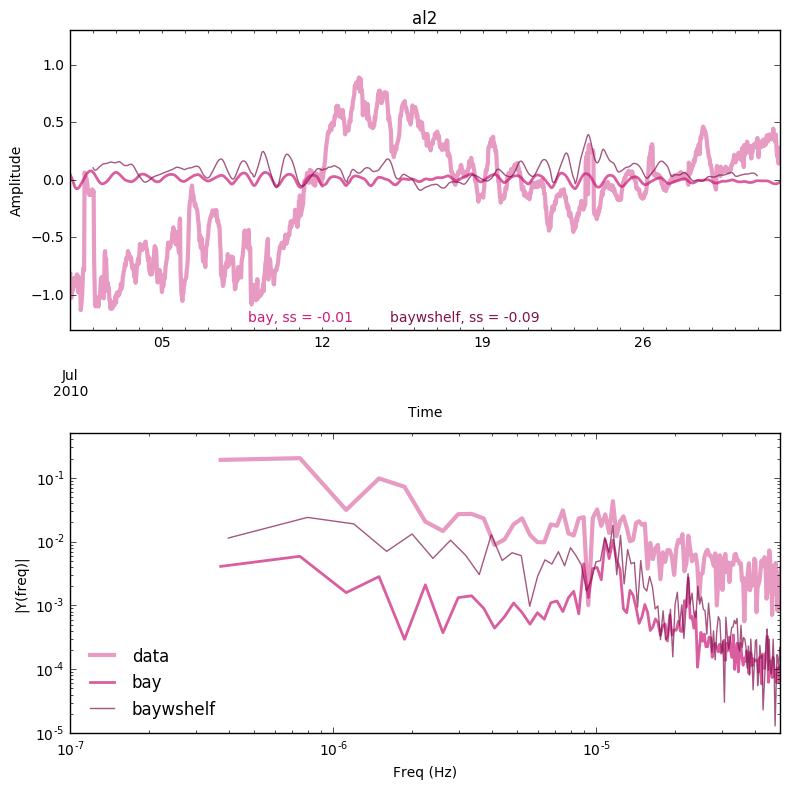

In [160]:
# 2010, far
comp_tabs.plot_spectra([dftabss[1]['2010-07'], dfbays[1].iloc[:,8:]['2010-07'], 
                        dfbays2[1].iloc[:,8:]], 'al', 
                       colors=pshades, lw=[3, 2, 1], legend=['data', 'bay', 'baywshelf'],
                      doss=True)